## Pandas library

In [575]:
import pandas as pd

## Dataframe

In [576]:
datas = [
            ["Mark",55,"Italy",4.5,"Europe"],
            ["john",33,"USA",6.9,"America"],
            ["Tim",41,"USA",3.9,"America"],
        ]
columns = ["name","age","country","score","continent"]

df = pd.DataFrame(data=datas,
                  columns= columns,
                  )
df

,name,age,country,score,continent
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


#### Index

In [577]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [578]:
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [579]:
df.reset_index()

,user_id,name,age,country,score,continent
0,0,Mark,55,Italy,4.5,Europe
1,1,john,33,USA,6.9,America
2,2,Tim,41,USA,3.9,America


In [580]:
df.set_index("name")

,age,country,score,continent
name,,,,
Mark,55,Italy,4.5,Europe
john,33,USA,6.9,America
Tim,41,USA,3.9,America


In [581]:
df.sort_index()

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [582]:
df.sort_index(ascending=False)

,name,age,country,score,continent
user_id,,,,,
2,Tim,41,USA,3.9,America
1,john,33,USA,6.9,America
0,Mark,55,Italy,4.5,Europe


In [583]:
df.sort_values(["continent"])

,name,age,country,score,continent
user_id,,,,,
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America
0,Mark,55,Italy,4.5,Europe


In [584]:
df.sort_values(["continent","age"])

,name,age,country,score,continent
user_id,,,,,
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America
0,Mark,55,Italy,4.5,Europe


In [585]:
df.sort_values(["continent","age"],ascending=False)

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
2,Tim,41,USA,3.9,America
1,john,33,USA,6.9,America


#### Columns

In [586]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [587]:
df.columns

Index(['name', 'age', 'country', 'score', 'continent'], dtype='object')

In [588]:
df_renames = df.rename(columns={"name": "First Name","age" : "Age"})

In [589]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [590]:
df_renames

,First Name,Age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [591]:
df.drop(columns=["name","country"])

,age,score,continent
user_id,,,
0,55,4.5,Europe
1,33,6.9,America
2,41,3.9,America


In [592]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [593]:
df.T

user_id,0,1,2
name,Mark,john,Tim
age,55,33,41
country,Italy,USA,USA
score,4.5,6.9,3.9
continent,Europe,America,America


## Data Manipulation

#### Selecting Data

In [594]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [595]:
df.loc[0,"name"]

'Mark'

In [596]:
df.loc[[0,1],"age"]

user_id
0    55
1    33
Name: age, dtype: int64

In [597]:
df.loc[:2,["name","country"]]

,name,country
user_id,,
0,Mark,Italy
1,john,USA
2,Tim,USA


In [598]:
df.iloc[0,0]

'Mark'

In [599]:
df.iloc[0,2]

'Italy'

In [600]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [601]:
tfs =  (df["age"] > 40) & (df["country"] == "USA")

In [602]:
df.loc[tfs,:]

,name,age,country,score,continent
user_id,,,,,
2,Tim,41,USA,3.9,America


In [603]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


Example1:  score > 4 and continent is Europe or America

In [604]:
tfs = (df['score'] > 4) & ((df['continent'] == "Europe") |  (df['continent'] == "America"))

In [605]:
df.loc[tfs,:]

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America


In [606]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [607]:
tfs= df["country"].isin(["Italy"])

In [608]:
df.loc[tfs,:]

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe


#### Copy dataframe

In [609]:
df2 = df.copy()
df2

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


#### Update data

In [610]:
df2.loc[1,"name"] = "JOHN"
df2

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,JOHN,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [611]:
tfs = df["age"] > 45
df2.loc[tfs,"score"] = 9.9
df2

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,9.9,Europe
1,JOHN,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [612]:
df2.replace("USA","U.S.")

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,9.9,Europe
1,JOHN,33,U.S.,6.9,America
2,Tim,41,U.S.,3.9,America


In [613]:
df2.loc[:,"discount"] = 1 
df2.loc[:,"price"] = [49.9,40.8,99.9] 
df2

,name,age,country,score,continent,discount,price
user_id,,,,,,,
0,Mark,55,Italy,9.9,Europe,1,49.9
1,JOHN,33,USA,6.9,America,1,40.8
2,Tim,41,USA,3.9,America,1,99.9


In [614]:
df2.loc[:,"birth year"] =  2022- df["age"]
df2

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,Mark,55,Italy,9.9,Europe,1,49.9,1967
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


#### Missing Data

In [615]:
df2.loc[0,"score"] = None

In [616]:
df2

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,Mark,55,Italy,NaN,Europe,1,49.9,1967
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


In [617]:
df2.isna()

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False


In [618]:
dfs = df2.fillna({"score": 0 })
dfs.isna()

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False


In [619]:
dfs

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,Mark,55,Italy,0.0,Europe,1,49.9,1967
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


In [620]:
df2.loc[0,"score"] = None
df2

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
0,Mark,55,Italy,NaN,Europe,1,49.9,1967
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


In [621]:
dfs = df2.dropna()
dfs

,name,age,country,score,continent,discount,price,birth year
user_id,,,,,,,,
1,JOHN,33,USA,6.9,America,1,40.8,1989
2,Tim,41,USA,3.9,America,1,99.9,1981


#### Duplicate Data

In [622]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [623]:
df["country"].is_unique

False

In [624]:
df["country"].unique()

array(['Italy', 'USA'], dtype=object)

In [625]:
df.drop_duplicates(["country"])

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America


In [626]:
df.loc[df["country"].duplicated(keep=False),:]

,name,age,country,score,continent
user_id,,,,,
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


#### Applying a function

In [627]:
rainfall = pd.DataFrame(data= {
                                "City 1": [300.111,100.222],
                                "City 2" : [400.333,300.444],
                                "City 3" : [10000.555,1100.666]
})
rainfall

,City 1,City 2,City 3
0,300.111,400.333,10000.555
1,100.222,300.444,1100.666


In [628]:
def format_string(x):
    return f"{x:,.1f}"

In [629]:
rainfall.applymap(format_string)

,City 1,City 2,City 3
0,300.1,400.3,"10,000.6"
1,100.2,300.4,"1,100.7"


## Combining Dataframes

#### Concatenating

In [630]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [631]:
datas = [
    [15,"france",4.1,"Becky"],
    [44,"Canada",6.4,"Leanne"]
]
more_users = pd.DataFrame(data=datas,
                            columns=["age","country","score","name"])
more_users

,age,country,score,name
0,15,france,4.1,Becky
1,44,Canada,6.4,Leanne


In [632]:
pd.concat([df,more_users])


,name,age,country,score,continent
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America
0,Becky,15,france,4.1,NaN
1,Leanne,44,Canada,6.4,NaN


In [633]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [634]:
datas = [
    [15,"france",4.1,"Becky"],
    [44,"Canada",6.4,"Leanne"]
]
more_users = pd.DataFrame(data=datas,
                            columns=["age1","country1","score1","name1"])
more_users

,age1,country1,score1,name1
0,15,france,4.1,Becky
1,44,Canada,6.4,Leanne


In [635]:
pd.concat([df,more_users])


,name,age,country,score,continent,age1,country1,score1,name1
0,Mark,55.0,Italy,4.5,Europe,NaN,NaN,NaN,NaN
1,john,33.0,USA,6.9,America,NaN,NaN,NaN,NaN
2,Tim,41.0,USA,3.9,America,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,15.0,france,4.1,Becky
1,NaN,NaN,NaN,NaN,NaN,44.0,Canada,6.4,Leanne


#### Joining and merge

In [636]:
df1 = pd.DataFrame(data= [
    [1,2],
    [3,4],
    [5,6]
],
    columns=["A","B"]
    )

df1

,A,B
0,1,2
1,3,4
2,5,6


In [637]:
df2 = pd.DataFrame(data= [
    [10,20],
    [30,40],
],
    columns=["C","D"]
    )

df2

,C,D
0,10,20
1,30,40


In [638]:
df1.join(df2,how="inner")

,A,B,C,D
0,1,2,10,20
1,3,4,30,40


In [639]:
df1.join(df2,how="left")

,A,B,C,D
0,1,2,10.0,20.0
1,3,4,30.0,40.0
2,5,6,NaN,NaN


In [640]:
df1.join(df2,how="right")

,A,B,C,D
0,1,2,10,20
1,3,4,30,40


In [641]:
df1.join(df2,how="outer")

,A,B,C,D
0,1,2,10.0,20.0
1,3,4,30.0,40.0
2,5,6,NaN,NaN


In [642]:
df1["category"] = ["a","b","c"]
df2["category"] = ["c","b"]

In [643]:
df1

,A,B,category
0,1,2,a
1,3,4,b
2,5,6,c


In [644]:
df2

,C,D,category
0,10,20,c
1,30,40,b


In [645]:
df1.merge(df2,how="inner", on=["category"])

,A,B,category,C,D
0,3,4,b,30,40
1,5,6,c,10,20


## Data Aggregation and Descriptive Statistics

#### Descriptive Statistics

In [646]:
rainfall

,City 1,City 2,City 3
0,300.111,400.333,10000.555
1,100.222,300.444,1100.666


In [647]:
rainfall.mean()

City 1     200.1665
City 2     350.3885
City 3    5550.6105
dtype: float64

In [648]:
rainfall.mean(axis=1)

0    3566.999667
1     500.444000
dtype: float64

#### Grouping

In [649]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [650]:
df.groupby(["continent"]).mean()

,age,score
continent,,
America,37.0,5.4
Europe,55.0,4.5


In [651]:
df.groupby(["continent"]).sum()

,age,score
continent,,
America,74,10.8
Europe,55,4.5


#### Pivoting

In [652]:
datas = [
    ["orange","north",12.30],
    ["apple","south",10.55],
    ["orange","south",22.00],
    ["banana","south",5.9],
    ["banana","south",31.3],
    ["orange","north",13.10]
]

sales = pd.DataFrame(data=datas,columns=["fruit","region","revenue"])
sales

,fruit,region,revenue
0,orange,north,12.30
1,apple,south,10.55
2,orange,south,22.00
3,banana,south,5.90
4,banana,south,31.30
5,orange,north,13.10


In [653]:
pivot = pd.pivot_table(sales,index="fruit",columns="region",
                        values="revenue",aggfunc="sum",
                        margins=True,margins_name="Total")
pivot

region,north,south,Total
fruit,,,
apple,NaN,10.55,10.55
banana,NaN,37.20,37.20
orange,25.4,22.00,47.40
Total,25.4,69.75,95.15


#### resample

In [654]:
index = pd.date_range('1/1/2000',periods=365,freq="D")
index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-21', '2000-12-22', '2000-12-23', '2000-12-24',
               '2000-12-25', '2000-12-26', '2000-12-27', '2000-12-28',
               '2000-12-29', '2000-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [655]:
range(365)

range(0, 365)

In [656]:
series = pd.Series(range(365),index=index)
series

2000-01-01      0
2000-01-02      1
2000-01-03      2
2000-01-04      3
2000-01-05      4
             ... 
2000-12-26    360
2000-12-27    361
2000-12-28    362
2000-12-29    363
2000-12-30    364
Freq: D, Length: 365, dtype: int64

In [657]:
summary = series.resample("M").sum()
summary

2000-01-31      465
2000-02-29     1305
2000-03-31     2325
2000-04-30     3165
2000-05-31     4216
2000-06-30     4995
2000-07-31     6107
2000-08-31     7068
2000-09-30     7755
2000-10-31     8959
2000-11-30     9585
2000-12-31    10485
Freq: M, dtype: int64

## Ploting

#### Matplotlib

In [658]:
import numpy as np
%matplotlib inline

In [659]:
datas = pd.DataFrame(data=np.random.rand(4,4)*100000,
                    index=["Q1","Q2","Q3","Q4"],
                    columns=["East","West","North","South"])
datas.index.name = "Quarthers"
datas.columns.name = "Region"
datas

Region,East,West,North,South
Quarthers,,,,
Q1,3250.229416,64965.960105,7362.389044,45798.651628
Q2,73157.934862,3337.054732,13651.869044,73456.052743
Q3,66693.906168,79572.105822,95211.187709,6718.297292
Q4,30469.484818,27225.422727,49956.141917,12440.695932


<AxesSubplot:xlabel='Quarthers'>

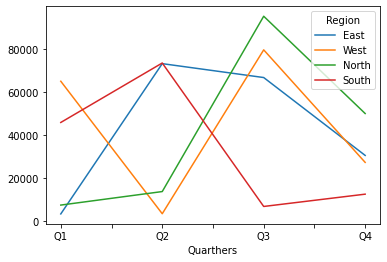

In [660]:
datas.plot()

<AxesSubplot:xlabel='Quarthers'>

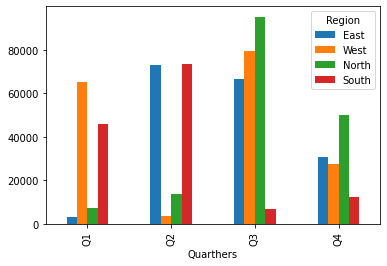

In [661]:
datas.plot(kind="bar")

In [662]:
#fig = datas.plot(kind="bar",figsize=(12,12),fontsize=26).get_figure()
#fig.savefig('export/bar_chart.png')

#### Plotly

In [663]:
pd.options.plotting.backend = "plotly"

In [664]:
#pd.options.plotting.backend = "matplotlib"

In [665]:
datas.plot()

In [666]:
datas.plot(kind="bar")

In [667]:
datas.plot(kind='bar',barmode="group")

In [668]:
datas.plot(kind='barh')

## Data import Export

#### Exporting to a CSV file

In [669]:
df

,name,age,country,score,continent
user_id,,,,,
0,Mark,55,Italy,4.5,Europe
1,john,33,USA,6.9,America
2,Tim,41,USA,3.9,America


In [670]:
df.to_csv("export/export_from_dataframe.csv")

#### Importing a excel file

In [671]:
df = pd.read_csv("export/export_from_dataframe.csv")
df

,user_id,name,age,country,score,continent
0,0,Mark,55,Italy,4.5,Europe
1,1,john,33,USA,6.9,America
2,2,Tim,41,USA,3.9,America


In [672]:
df = pd.read_excel("data/course_participants.xlsx")
df

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [673]:
df = pd.read_excel("data/stores.xlsx",sheet_name="2019",skiprows=1,usecols="B:F")
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,MISSING
2,Chicago,4,Katelin,2020-01-31,NaN
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [674]:
df.isna().sum()

Store        0
Employees    0
Manager      0
Since        1
Flagship     1
dtype: int64

In [675]:
df["Flagship"].unique()

array([False, 'MISSING', nan, True], dtype=object)

In [676]:
df = df.replace("MISSING", False)
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,False
2,Chicago,4,Katelin,2020-01-31,NaN
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [677]:
df = df.fillna({"Flagship": False })

In [678]:
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,False
2,Chicago,4,Katelin,2020-01-31,False
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [679]:
df["Since"].unique()

array(['2018-07-20T00:00:00.000000000', '2019-11-02T00:00:00.000000000',
       '2020-01-31T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
                                 'NaT', '2020-01-06T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [681]:
print(df.isna().sum())
df = df.dropna()
df

Store        0
Employees    0
Manager      0
Since        0
Flagship     0
dtype: int64


,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,False
2,Chicago,4,Katelin,2020-01-31,False
3,Boston,5,Georgiana,2017-04-01,True
5,Las Vegas,11,Paul,2020-01-06,False
